In [1]:
from stable_baselines.td3 import TD3, LnCnnPolicy, LnMlpPolicy
from env import *
import tensorflow as tf
from config import config

/home/cocowang/anaconda3/envs/rl/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/cocowang/anaconda3/envs/rl/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/cocowang/anaconda3/envs/rl/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/cocowang/anaconda3/envs/rl/lib/python3.6/site-

In [2]:
policy = LnMlpPolicy
env = SketchDesigner(SketchDiscriminator(config['SAVED_GAN']))
agent = TD3(policy, env, random_exploration=0.1, tensorboard_log='./log/',verbose=1)
#agent.get_env().env_method('get_policy', agent.policy_tf)
agent.get_env().get_policy(agent.policy_tf)



Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use keras.layers.dropout instead.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use keras.layers.dense instead.





Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./saved_gan/1/model1.ckpt




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




In [3]:
agent.load('./save/model',env = env)

In [4]:
from matplotlib import pyplot as plt

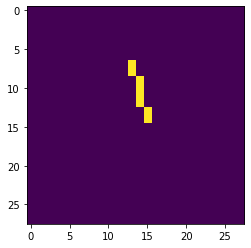

In [35]:
env.reset()
while True:
    act = agent.predict(env.get_state()*255)[0]
    _, _,terminal,_ = env.step(act)
    if terminal:
        break
        
plt.imshow(env.get_state().reshape(28,28))
plt.show()

In [13]:
env.get_state()

array([[[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
  

In [21]:
env.max_t

AttributeError: 'SketchDesigner' object has no attribute 'max_t'